# Predicting heart disease using ml¶
This notebook looks into using various python based ml and data science libraries in an attempt to build a ml model capable of predicting whether or not someone has heart diesease based on their medical attributes.

We're going to do -     1.Problem definition     2.Data     3.Evaluation     4.Features     5.Modelling     6.Experimentation

## 1. Problem Definition
In a statement,

Given clinical parameters about a patient,can we predict whether or not they have heart disease?

## 2.Data
The original data came from cleaveland data from UCI machine learning repository Heart Disease

## 3. Evaluation
If we can reach 95% accuracy at predicting heart disease during proof of concept then we will pursue the project

## 4. Features
this is where we get all info about each of the features in your data
create data dictionary

* age: in years

* sex: 1 = male; 0 = female

* cp: chest pain type; Value 1: typical angina; Value 2: atypical angina; Value 3: non-anginal pain; Value 4: asymptomatic

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)

* cholestrol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* restecg: resting electrocardiographic results; values 0,1,2 represent normal, ST-T wave abnormality, left ventricular hypertrophy respectively

* thalach: maximum heart rate achieved

* exang cardiovascular exercise induced angina (1 = yes; 0 = no) oldpeak ST depression induced by exercise relative to rest (‘ST’ relates to positions on an electrocardiogram.) slope the slope of the peak exercise ST segment

* ca number of major vessels (0-3) colored by fluoroscopy

* thal 0 = normal; 1 = fixed defect; 2 = reversable defect

* num diagnosed with heart disease (angiographic disease status); also known as ‘Target’ — Zero indicates absence of heart disease
* slope-the slope of peak excercise ST segment
    * 0:Unsloping : better heartrate with excercise (uncommon)
    * 1:Flatsloping : minimal change(typical health heart)
    * 2:Downsloping : signs of unhealthy heart

## Preparing the tools
we're going to use pandas,matplotlib and numpy for data analysis and manipulation

In [1]:
#Import all the tools we need

#Regual EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay



In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA or exploratory data analysis)
find out more about the data  and become a subject matter expert on the dataset you're working with.
1. What questions are you trying to solve?
2. What kind of data we have and how do you deal with it?
3. What's missing from the data and how you deal with it?
4. Where are the outliers and why you should care about them?
5. How can you add ,change or remove features to get more  out of your  data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Lets find out how many of each classes are there?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
#relatively balanced

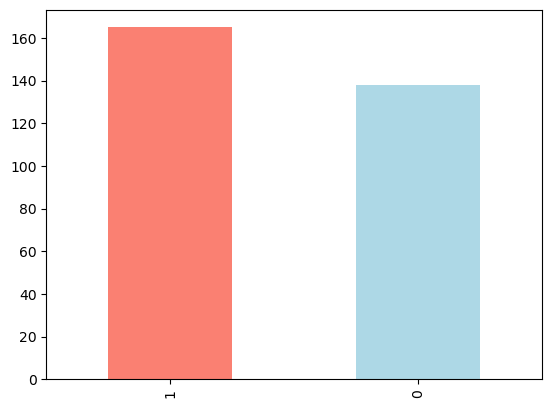

In [6]:
# Checking visually if there are class imbalances or no

df['target'].value_counts().plot(kind="bar",color=['salmon','lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

<AxesSubplot: >

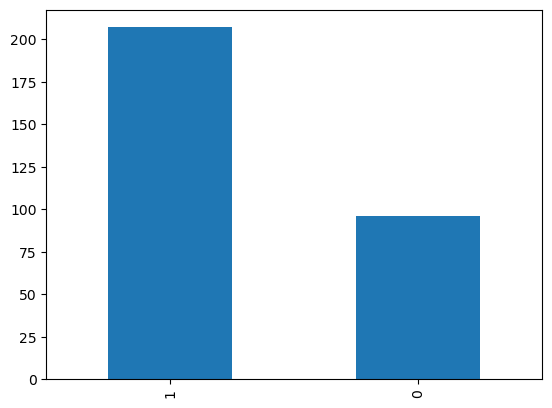

In [10]:
# 1=Male and 0=Female
df.sex.value_counts().plot(kind="bar")

In [11]:
# Compare target columns with sex column
pd.crosstab(df.target,df.sex)
#based on the given data, we can say a women has about 75% chances of having heart-disease

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
72/(72+24) ,93/(93+114)

(0.75, 0.4492753623188406)

If we are told to guess whether a particular sex has chance to have heart disease or not
then we can say that women are likely to have heart disease than men on basis of this data

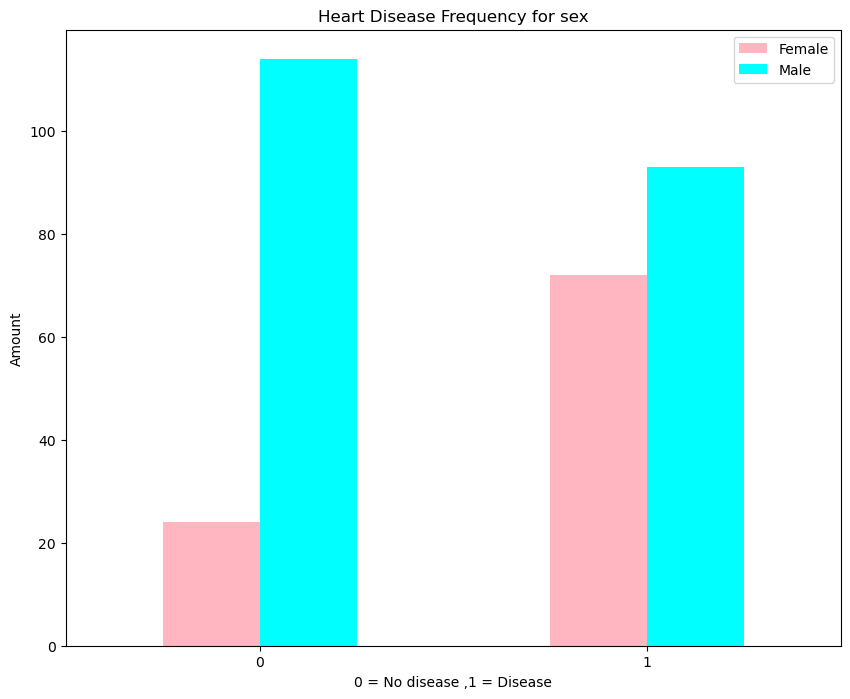

In [13]:

pd.crosstab(df.target,df.sex).plot(kind='bar',color=['lightpink','cyan'],figsize =(10,8))
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No disease ,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Visually we can infer that for men are more liekly to not have heart disease as compared to women
while women are more liekly to have heart disease despite the men having more samples for heart disease

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot: xlabel='target'>

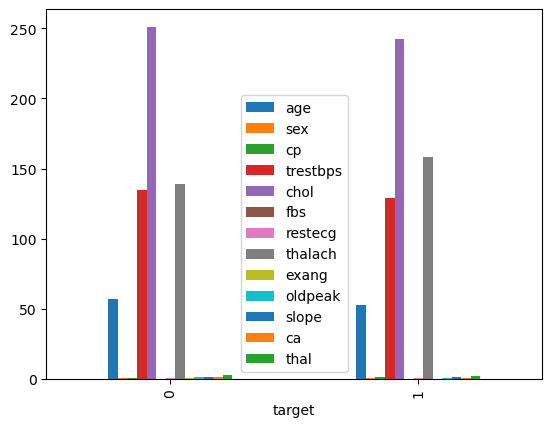

In [15]:
df.groupby('target').mean().plot(kind="bar")

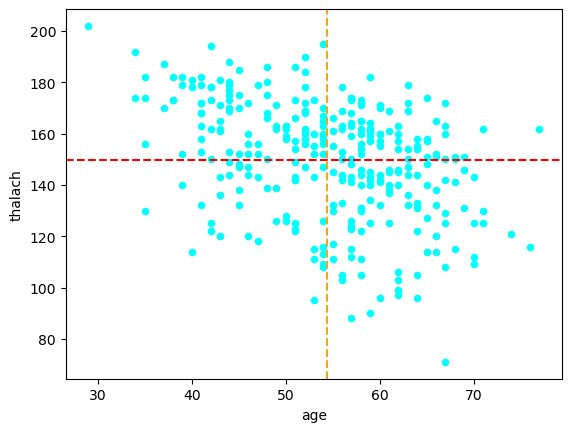

In [16]:
df.plot(kind="scatter",y="thalach",x="age",color="cyan")
plt.axhline(y=df['thalach'].mean(),linestyle='--',color="red")
plt.axvline(x=df['age'].mean(),linestyle='--',color="orange")

Trend is that with increasing age,thalach is decreasing
so what we should do is that with increasing age does heart disease increase ?

### Max Heart Rate vs Age



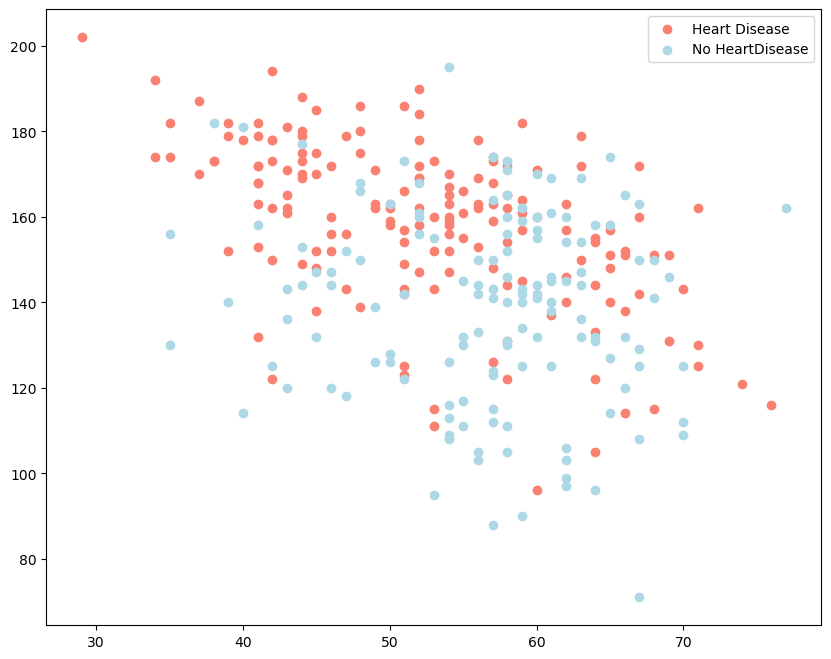

In [17]:
plt.figure(figsize=(10,8))

#Scatter with postive example
plt.scatter(df.age[df['target']==1],df.thalach[df['target']==1],c = "salmon")
#Scatter with negative example
plt.scatter(df.age[df['target']==0],df.thalach[df['target']==0],c = "lightblue")
plt.legend(['Heart Disease','No HeartDisease'])

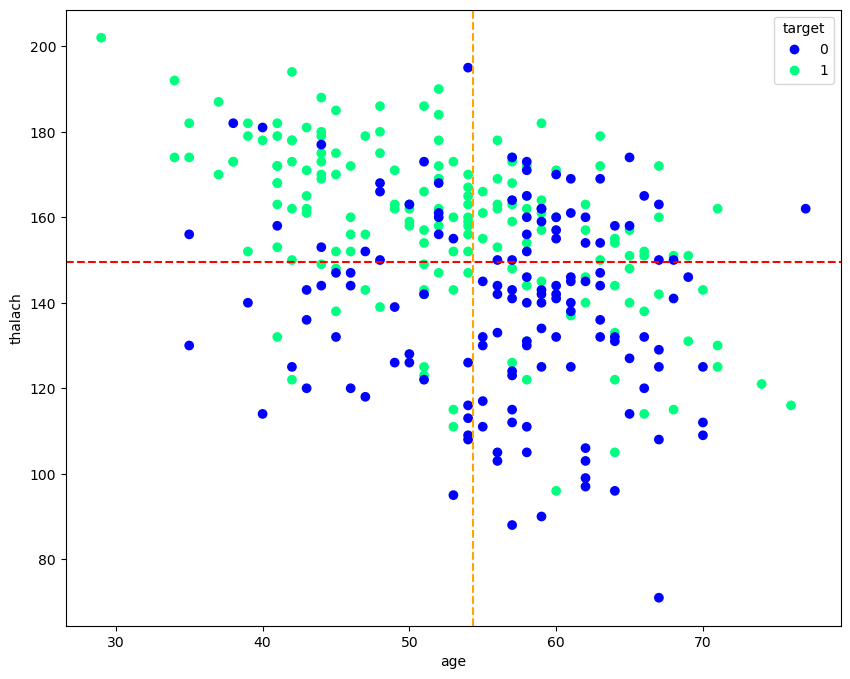

In [18]:
# Better plot

fig,ax=plt.subplots(figsize=(10,8))
scatter=plt.scatter(x=df['age'],y=df['thalach'],c=df['target'],cmap='winter')
ax.legend(*scatter.legend_elements(),title='target')
plt.axhline(y=df['thalach'].mean(),linestyle='--',color="red")
plt.axvline(x=df['age'].mean(),linestyle='--',color="orange")
plt.xlabel('age');plt.ylabel('thalach');


From the graph we can infer that below mean thalach as age increase or decrease
visually the chances of people
having heart disease are less
above mean thalach,we see that the chances of having heart disease increases signficantly especially
below age 55
but above 55 the chances of having heart disease with above mean thalach seems to be 50% also
keep note that overall trend is that thalach decrease with age

we can make an guess that with decrease thalach with age ,there seems to be less chance of heartdisease

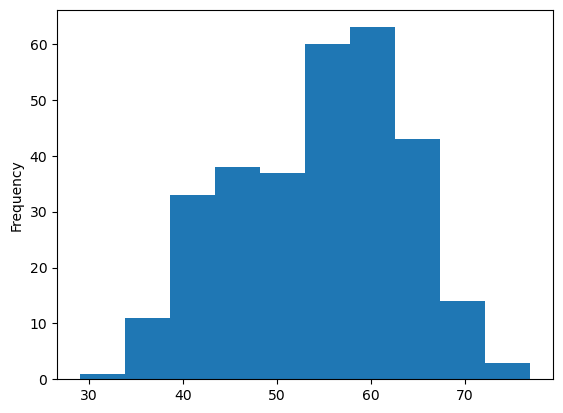

In [19]:
# Check the distribution of the age column with histogram
df.age.plot.hist();
#Seems that most the data is from age 50 to 60

<AxesSubplot: ylabel='Frequency'>

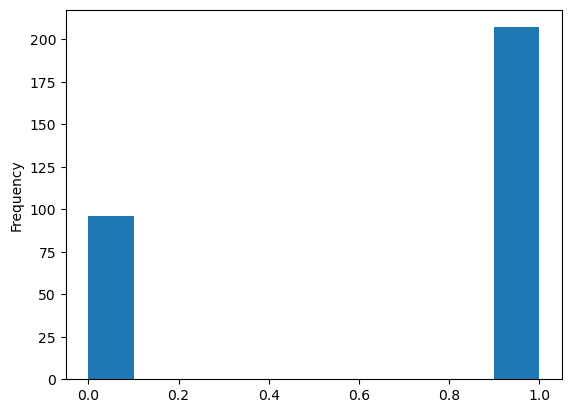

In [20]:
df.sex.plot.hist()

<AxesSubplot: ylabel='Frequency'>

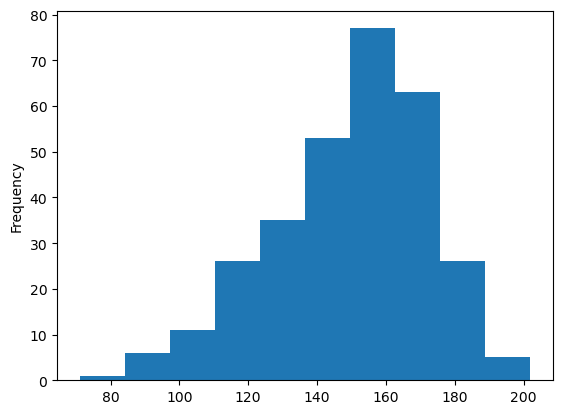

In [21]:
df.thalach.plot.hist() #b/w 140 to 180 max samples of thalach is lying

<AxesSubplot: ylabel='Frequency'>

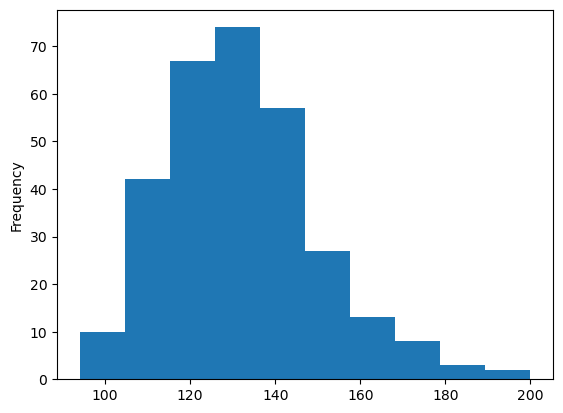

In [22]:
df.trestbps.plot.hist() #b/w 120 to 140 max samples of trestbps is lying

<AxesSubplot: ylabel='Frequency'>

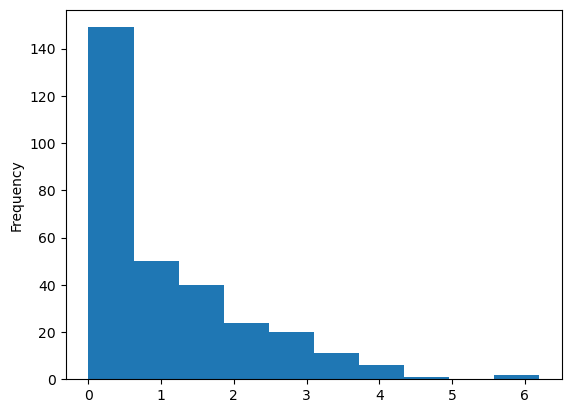

In [23]:
df.oldpeak.plot.hist()

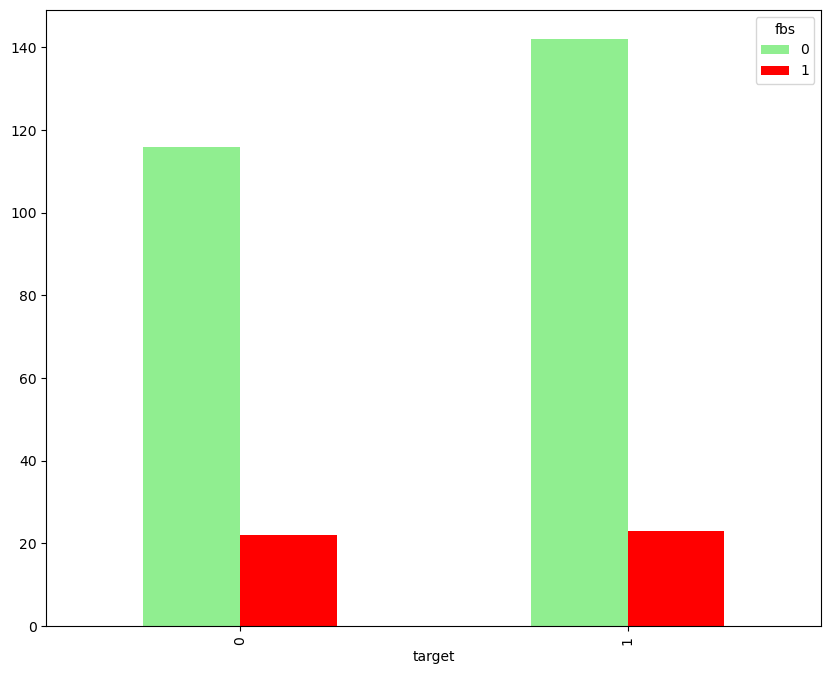

In [24]:
pd.crosstab(df.target,df.fbs).plot(kind='bar',color=['lightgreen','red'],figsize =(10,8));


fbs = 1 ,50% chances of having heart disease ,vice-versa
fbs = 0,we can say ,not absolutely that having fbs = 0 is means you have higher chance of having
heart disease as compared to fbs =1

In [25]:
fbs_0 = df[df['fbs']==0]
fbs_0[fbs_0['target']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
fbs_1 = df[df['fbs']==0]
fbs_1[fbs_1['target']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [27]:
total = 116+142

In [28]:
#0,0
116/total

0.4496124031007752

In [29]:
#0,1
142/total

0.5503875968992248

so there is 10% more chances of having heart disease when fbs = 0

### Heart Disease Frequency per Chestpain Type

<AxesSubplot: >

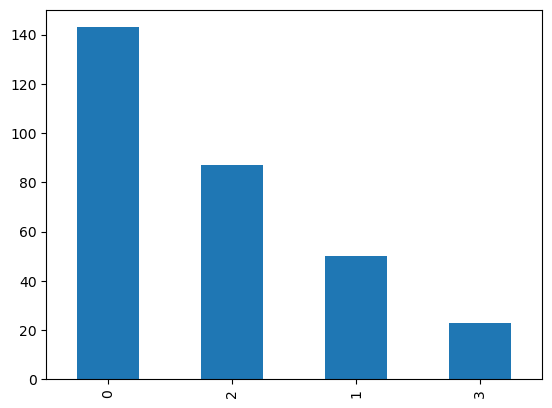

In [30]:
df.cp.value_counts().plot(kind = "bar")

>cp: chest pain type; Value 0: typical angina related to decrease blood suppy to heart; Value 1: atypical angina , cp not related to heart; Value 2: non-anginal pain,esophageal spasm(non heart realted); Value 3: asymptomatic,cp not showing sign of disease

Text(0, 0.5, 'Amount')

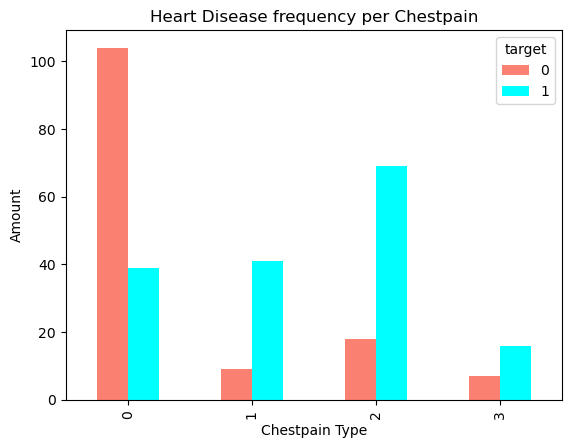

In [31]:
# Making it more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','cyan'])
plt.title("Heart Disease frequency per Chestpain")
plt.xlabel("Chestpain Type")
plt.ylabel("Amount")

`Inference` - for type 0 we see that most of the samples doesnt have heart disease which suggests
most the chest pain type typical agina  means they most likely does'nt heart disease
for type 1 ,it is inferring that if someone has type 1 chestpain he/she is more likely to have heartdisease
same is true for type 2 as well

### Correlation Matrix

In [32]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


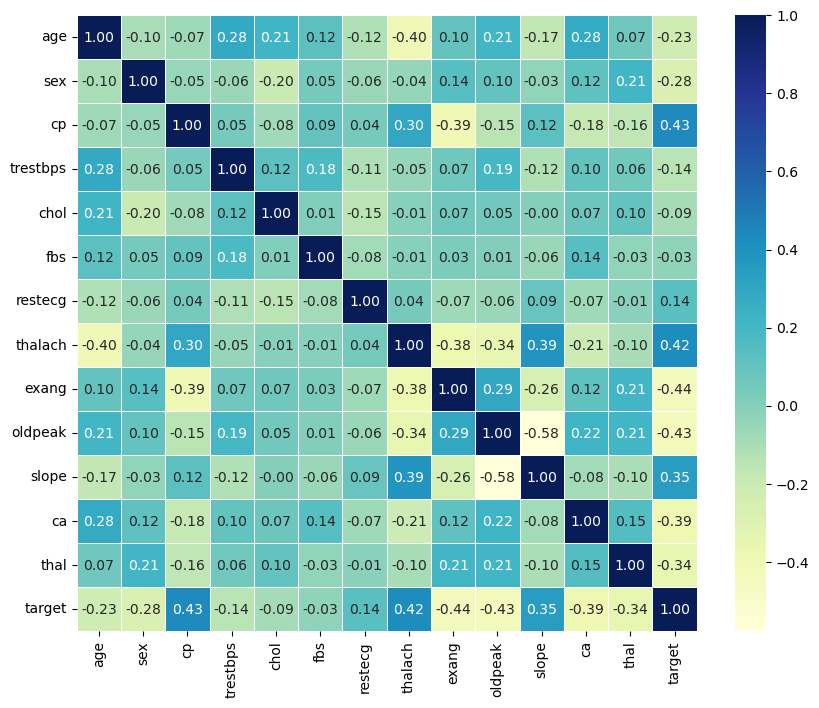

In [33]:
# Making correlation matrix more visual
df_corr=df.corr()
fig,ax=plt.subplots(figsize = (10,8))
ax = sns.heatmap(df_corr,
                annot=True,
                linewidth = 0.5,
                cmap= "YlGnBu",
                fmt= ".2f")

<AxesSubplot: xlabel='target'>

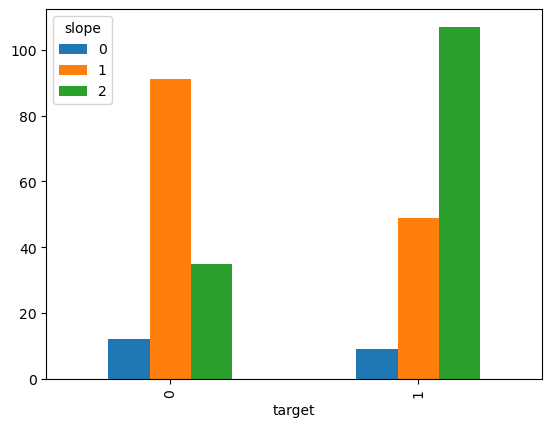

In [34]:
#as slope increase,target increase too - somewhat true
pd.crosstab(df.target,df.slope).plot(kind="bar")

<AxesSubplot: xlabel='exang'>

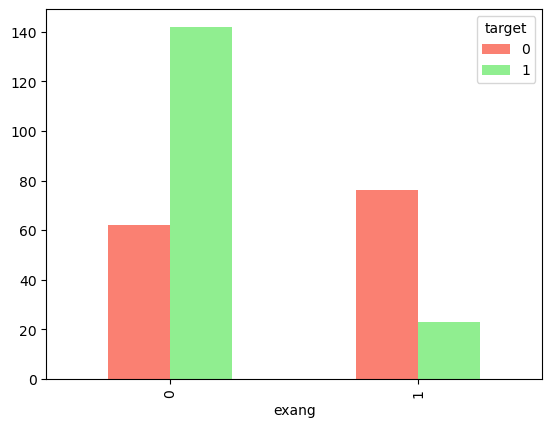

In [35]:
pd.crosstab(df.exang,df.target).plot.bar(color=['salmon','lightgreen'])

From the above graph we can clearly see as the value of exang increase that is 1,the no of samples for 
target = 1 decrease.As exang decrease the no of samples for 1 increase
so to minimise heart disease one should aim to increase exang

  # 5. Modelling 

In [36]:
#split data into X and y
X=df.drop('target',axis=1)

y=df['target']

In [37]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [39]:
#Split data into train-test split

np.random.seed(42)

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [40]:
 X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [41]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got data split into train and test split,its time to build a machine learning model
We'll train it (find patterns) on training sets.

And we'll test it on the test set.
`1.Logistic Regression
    2.K-Nearest Neightbor Classifier
     3.Random Forest Regressor`

In [42]:
models = {'lr':LogisticRegression(),
      'knn':KNeighborsClassifier(),
      'rfc':RandomForestClassifier()}

def fit_and_score(models,X_train,y_train,X_test,y_test):
    """Fit and evaluate different machine learning model"""
    np.random.seed(42)
    result={}
    for model_name,model in models.items():
        model.fit(X_train,y_train)
    
        result[model_name]=model.score(X_test,y_test)
    return result


In [43]:
result=fit_and_score(models,X_train,y_train,X_test,y_test)

C:\Users\atrib\ketuproj\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
result

{'lr': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

### MODEL COMPARISION



<AxesSubplot: >

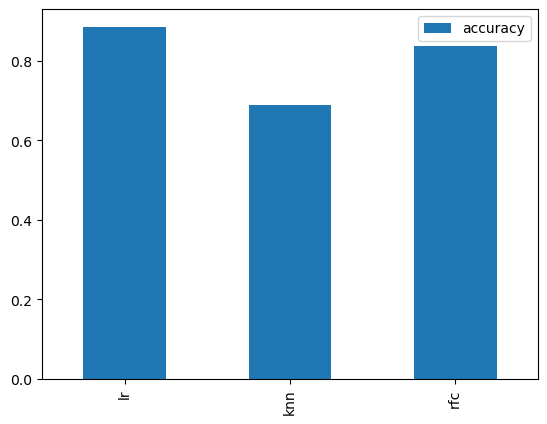

In [45]:
model_compare = pd.DataFrame(result,index=["accuracy"])
model_compare.T.plot(kind="bar")

### HYPERPARAMETER TUNING

In [46]:
#Lets tune KNN

train_scores=[]
test_scores=[]

#Create a list of different values of n_neighbors
neighbors=range(1,21)
#Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different values of neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [47]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [48]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

MAX TEST SCORES ON KNN 75.41%


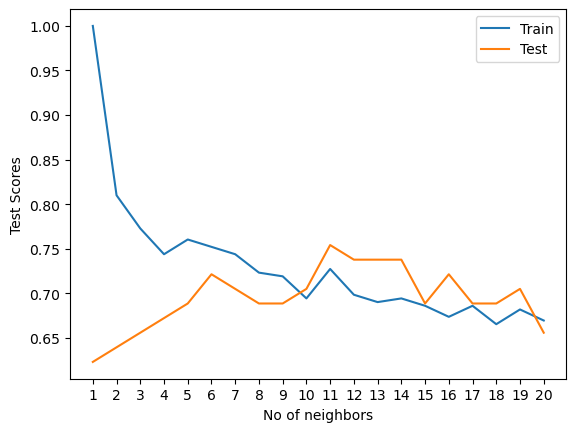

In [49]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.legend(['Train','Test'])
plt.xlabel("No of neighbors")
plt.ylabel("Test Scores")
plt.xticks(np.arange(1,21,1));
print(f"MAX TEST SCORES ON KNN {max(test_scores)*100:.2f}%")

In [50]:
from scipy.stats import uniform, randint

In [51]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [52]:
np.random.seed(42)
#Creating LogisticRegressor
lr=LogisticRegression()
#Creating grid for logisticregression

lr_grid ={
    'C': np.logspace(-4,4,10),
    'solver': ['liblinear'],
}
#Create a hyperparameter grid for randomforest
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

#RandomizedSearch
rs=RandomizedSearchCV(lr,
                     param_distributions=lr_grid,
                      cv=5,
                      n_iter=20,
                      verbose=True
                     )
#fitting the rs
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\atrib\ketuproj\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
rs.best_score_

0.8181122448979592

In [54]:
# RandomForestClassifier
clf=RandomForestClassifier()
rs=RandomizedSearchCV(clf,
                     param_distributions=rf_grid,
                     scoring="accuracy",
                     cv=5,
                     n_iter=20,
                     verbose=True,
                     )
#fitting the rs
rs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='accuracy', verbose=True)

In [55]:
rs.best_params_

{'n_estimators': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': None}

In [56]:
rs.score(X_train,y_train)

0.8677685950413223

In [57]:
result

{'lr': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

### Hyperparameter tuning with GridSearchCV
logisticregression performs the best so now its time to tune lr
tuning logisticregression with gridsearchcv

In [58]:
#Setting log grid
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
#setting up gridsearch
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid= log_reg_grid,
                       cv=5,
                       verbose=True)
#fitting gridsearchcv
gs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [59]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
#Evaluate lr
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [61]:
result

{'lr': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

In [62]:
np.logspace(-4,4,10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

### Evaluating our tuned machine learning classifier,beyond accuracy
* ROC CURVE AND AUC
* Conufusion Matrix
* Classification Report
* Precision
* Recall
* f1 scores

..And it would be great if crossvalidation is used where possible
to make comparision and evaluate our trained model,first we need to make predictions

In [64]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

In [65]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [91]:
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score

In [92]:
y_preds_pos=gs_log_reg.predict_proba(X_test)[:,1]


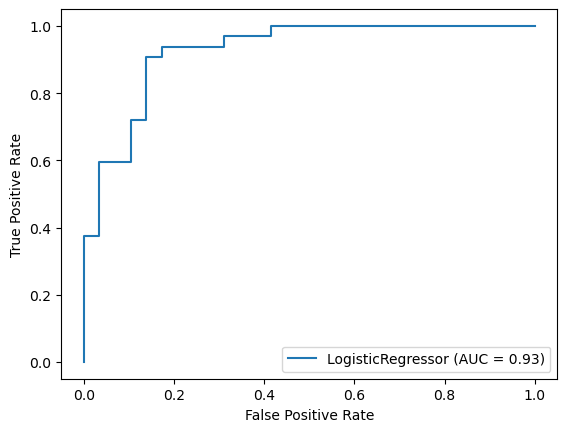

In [93]:
fpr,tpr,thresholds=roc_curve(y_test,y_preds_pos)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name="LogisticRegressor",roc_auc=roc_auc_score(y_test,y_preds_pos))
display.plot();

In [95]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [98]:

def conf_matrix(y_test,y_preds):
    """Plots a nice looking confusion matrix"""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False) #cbar means color bar
    plt.xlabel("True Label")
    plt.ylabel("False Label")

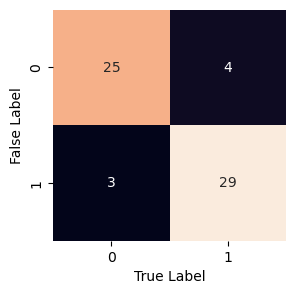

In [99]:
conf_matrix(y_test,y_preds)

  Now we`ve got Auc and roc curve
    lets get classfication report as well as crossvalidated precision,recall and f1 score

In [101]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using crossvalidations
calc precision,recall,f1 score using `cross_val_score()`

In [102]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [106]:
#Using best hyperparameters
lr=LogisticRegression(C= 0.20433597178569418,
                      solver= 'liblinear')

In [126]:
#Calculating precision
precision=cross_val_score(lr,X,y,scoring="precision",cv=5)
precision.mean()

0.8207936507936507

In [127]:
#Calculating Recall
recall=cross_val_score(lr,X,y,scoring="recall",cv=5)
recall.mean()

0.9212121212121213

In [128]:
#Calculating f1
f1=cross_val_score(lr,X,y,scoring="f1",cv=5)
np.mean(f1) 

0.8673007976269721

In [129]:
#Accuracy
accuracy=cross_val_score(lr,X,y,scoring="accuracy",cv=5)
np.mean(accuracy) 

0.8446994535519124

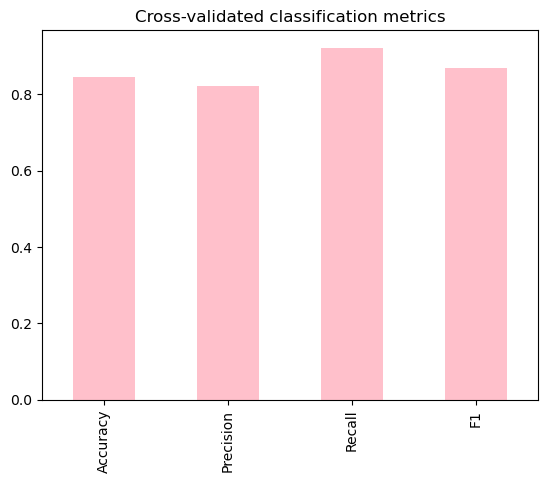

In [142]:
#Visualise 
cv_metrics=pd.DataFrame({"Accuracy":accuracy.mean(),
                        "Precision":precision.mean(),
                        "Recall":recall.mean(),
                        "F1":f1.mean()},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False,color=['pink']);

### Feature importance
Feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Lets find the feature importance on LogisticRegression model.

In [146]:
# Fit an instnace of logistic regression
lr=LogisticRegression(C=0.20433597178569418,
                     solver="liblinear")
lr.fit(X_train,y_train);

In [147]:
# check coef_
lr.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [153]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
#Match coef`s of features to columns
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

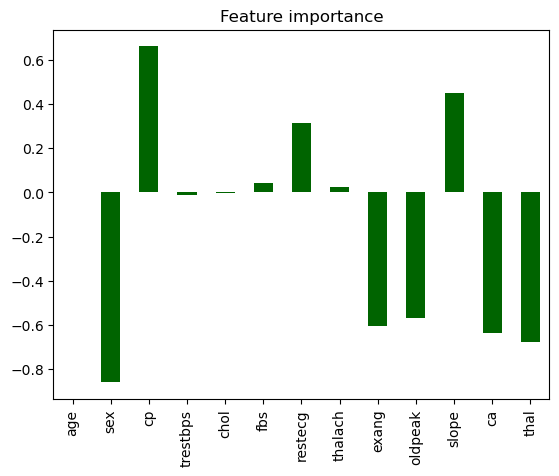

In [164]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False,color="darkgreen");

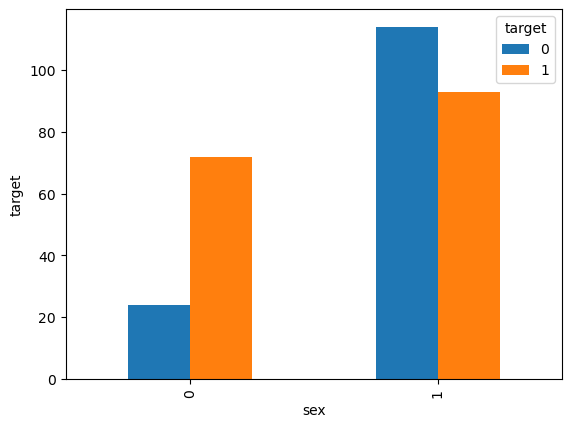

In [167]:
pd.crosstab(df["sex"],df["target"]).plot.bar(xlabel="sex",ylabel="target");

sex value increase ,we can see a decrease in value of 1 which means it has negative correlation

In [169]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope-the slope of peak excercise ST segment
* 0:Unsloping : better heartrate with excercise (uncommon)
* 1:Flatsloping : minimal change(typical health heart)
* 2:Downsloping : signs of unhealthy heart